## Задание 1

Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

## Решение:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
water = pd.read_csv('water.csv')

In [26]:
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [27]:
water.shape

(61, 5)

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

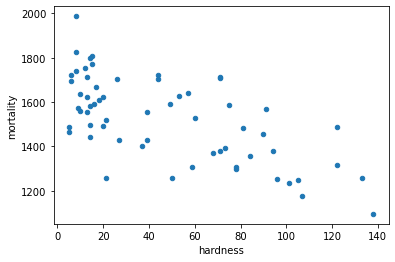

In [28]:
water.plot(kind='scatter', x='hardness', y='mortality')

### Коэффициент корреляции Пирсона:

In [29]:
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


### Коэффициент корреляции Спирмена:

In [58]:
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


### Вывод:
График и оба коэффициента корреляции показывают, что связь между жесткостью воды и смертностью в регионе может существовать. На графике заметна тенденция к снижению уровня смертности с повышением жесткости воды. Коэффициенты также показывают значительную (больше 0,6) отрицательную корреляцию.

Сделать вывод на основании исключительно этих данных нельзя. Вероятно, стоит обратить внимание на возможность существования взаимосвязи между этими двумя показателями и провести дополнительные исследования.

### Модель линейной регрессии

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [117]:
X = water[['hardness']]
y = water['mortality']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [122]:
X_train.shape

(45, 1)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = model.predict(X_test)

In [121]:
model.score(X_test, y_test)

0.45536501995527645

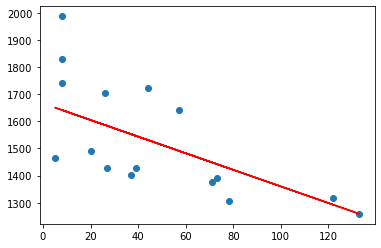

In [67]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [80]:
residuals = y_pred - y_test
residuals

45   -345.520588
2     184.648947
30   -117.537798
20   -191.555008
17    118.727551
29   -186.520588
35    156.405691
60     70.919177
13    120.523596
52   -148.289659
15    113.801272
22   -100.520588
34      0.415454
27    150.840574
10     50.806154
18    -24.962918
Name: mortality, dtype: float64

(array([1., 0., 2., 1., 2., 0., 2., 2., 3., 3.]),
 array([-345.52058768, -292.50363418, -239.48668068, -186.46972718,
        -133.45277368,  -80.43582018,  -27.41886668,   25.59808682,
          78.61504032,  131.63199382,  184.64894732]),
 <BarContainer object of 10 artists>)

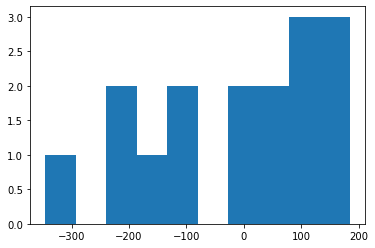

In [81]:
plt.hist(residuals)

(array([2., 1., 2., 4., 3., 3., 0., 0., 0., 1.]),
 array([  0.41545415,  34.9259675 ,  69.43648085, 103.94699421,
        138.45750756, 172.96802091, 207.47853427, 241.98904762,
        276.49956097, 311.01007433, 345.52058768]),
 <BarContainer object of 10 artists>)

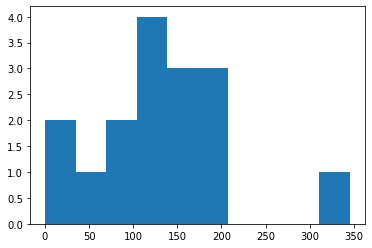

In [82]:
plt.hist(residuals.abs())

### Вывод:

Модель строит весьма посредственные предсказания. Коэффициент детерминации всего 0,45, а на графике остатков можно заметить весьма серьезные отклонения. Серьезных закономерностей в распределении остатков не прослеживается. Распределение абсолютного значения даже немного напоминает нормальное.

Вероятно, это связано с размером набора данных — модель обучалась всего на 45 значениях.

## Задание 2

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

## Решение:

### Юг

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

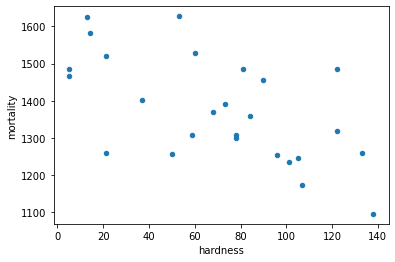

In [94]:
s_water = water[water.location == 'South']
s_water.plot(kind='scatter', x='hardness', y='mortality')

In [108]:
s_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [107]:
s_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [130]:
X = s_water[['hardness']]
y = s_water['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.24303469222041518

In [125]:
X_train.shape

(19, 1)

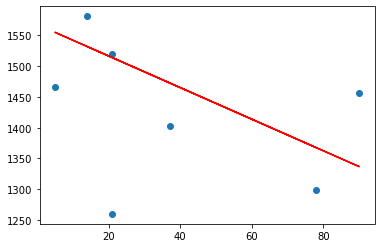

In [113]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Вывод:

На графике связь между величинами уже не прослеживается так явно, как во всей выборке, но коэффициенты Пирсона и Спирмена, хотя их значения уменьшились, по-прежнему показывают значительную корреляцию между величинами.

Модель работает ужасно (хуже наивной модели). При разных значениях random_state значение коэффициента детерминации скачет от -0,15 до -2. Подняться выше нуля ни разу не получилось. Это неудивительно, ведь модель обучалась всего на 19 значениях.

### Север

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

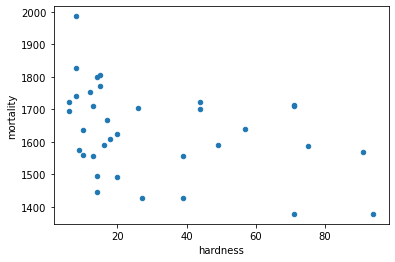

In [95]:
n_water = water[water.location == 'North']
n_water.plot(kind='scatter', x='hardness', y='mortality')

In [110]:
n_water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [109]:
n_water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [114]:
X = n_water[['hardness']]
y = n_water['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

-0.15584196826031516

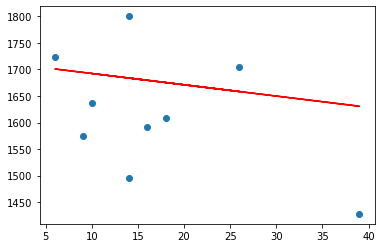

In [115]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

### Вывод:
Связь между величинами в этом случае меньше, чем в любом из предыдущих. При высокой жесткости смертность не достигает максимальных значений, но при низкой жесткости наблюдаются уровни смертности по всему диапазону. Это отчасти связано с сокращением самого диапазона.

При этом сама по себе северная выборка отчасти подтверждает первоначальную гипотезу. Оба диапазона данных сократились по сравнению с первоначальной выборкой: жесткость воды в целом ниже, а смертность в целом выше. Но это скорее интересное наблюдение, чем основание для каких-либо выводов.

Модель линейной регрессии предсказывает значения ужасно. Вероятно, это связано в первую очередь с небольшим размером обучающей выборки.